<a href="https://colab.research.google.com/github/solharsh/All_Neural_Networks/blob/master/Object_Detecting_YOLO_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install gluoncv

In [2]:
pip install mxnet

# 1. PREDICTING WITH PRE-TRAINED RCNN

In [0]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

In [0]:
#Let’s get an Faster RCNN model trained on Pascal VOC dataset with ResNet-50 backbone.
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

In [0]:
#For RCNN, short edge of the picture is resized to 600px.
im_fname = utils.download('https://github.com/solharsh/Computer_Vision/blob/master/' +
                          'IMG_20191124_161501.jpg?raw=true',
                          path='IMG_20191124_161501.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

#https://github.com/solharsh/Computer_Vision/blob/master/IMG_20191124_161501.jpg

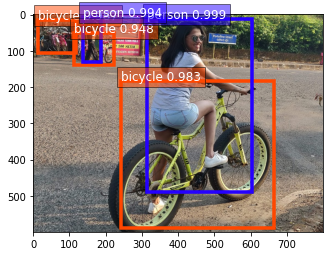

In [6]:
#Let's get the prediction of one of my friend's picture from Lavasa
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

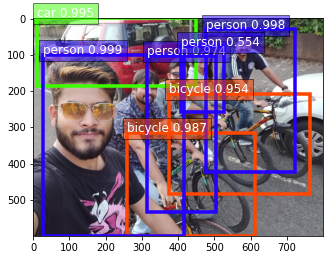

In [7]:
#Let's get prediction of even more complicated image stuffed with us, car and bicycles
im_fname = utils.download('https://github.com/solharsh/Computer_Vision/blob/master/' +
                          'IMG_20191124_155957.jpg?raw=true',
                          path='IMG_20191124_155957.jpg')
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

#Let's get the prediction.
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

# 2. PREDICTING WITH PRE-TRAINED YOLO:

In [0]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

In [0]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

Here we specify that we resize the short edge of the image to 512 px. You can feed an arbitrarily sized image. Once constraint for YOLO is that input height and width can be divided by 32.

In [13]:
im_fname = utils.download('https://raw.githubusercontent.com/solharsh/' +
                          'Computer_Vision/tree/master/demo_data/dog.jpg',
                          path='dog.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

#https://github.com/solharsh/Computer_Vision/tree/master/demo_data

Shape of pre-processed image: (1, 3, 416, 555)


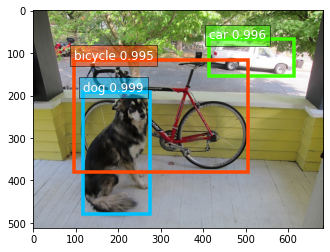

In [4]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

In [0]:
im_fname = utils.download('https://raw.githubusercontent.com/solharsh/' +
                          'Computer_Vision/blob/master/IMG_5738.jpg',
                          path='IMG_5738.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)


#https://github.com/solharsh/Computer_Vision/blob/master/IMG_5738.jpg